<a href="https://colab.research.google.com/github/yarwen0/Deep_learning/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow opencv-python matplotlib


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoids OOM errors by setting GPU Memory COnsumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

<ipython-input-4-45c64f998d76>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'

In [6]:
os.listdir(os.path.join(data_dir, "happy"))

['images (4).jpeg',
 'Happiest-person-in-the-world-.jpg',
 'bae816b4-77f0-416e-9fbf-0a7d9e4ee3ac.jpeg',
 'image (21).svg',
 'Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg',
 'image (9).svg',
 'ACg8ocKGNvoO-HgRwYZz-0BEdTyyp2aH9T_ofRa6njI5XzyHfvRmcUm8.jpeg',
 'behaviors-only-truly-happy-people-display.png',
 'eyJidWNrZXQiOiJvbS1wdWItc3RvcmFnZSIsImtleSI6ImFjdGl2ZWJlYXQv.webp',
 'image (3).svg',
 'images.jpeg',
 'image (6).jpeg',
 'images (2).jpeg',
 'Couple_Happy_money_062618.jpg',
 'GettyImages-565706549-949x534.jpg',
 'happy-people.jpeg',
 'image (14).svg',
 'happy-person.jpg',
 'AF2bZyhq2ECqioX-_ZZ1S0tolxE-OxKoSN9EAXBKB7cYo6liA0s-s32-c-mo.jpeg',
 'Happy_People_A_Year_in_the_Taiga_poster.jpg',
 'hand-drawn-happy-people-jumping_23-2149092878.jpg',
 'happy-people-3.jpg',
 'images (17).jpeg',
 'A_Sep20_14_1189155141.jpg',
 'diverse-group-of-people-forming-circle-smiling-together-phot.jpg',
 'HABITS-OF-HEALTHY-PEOPLE.jpg',
 'image (18).svg',
 'istock-508455188-033183f45ba393ed4745b2dd1213c3

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
#remove dodgy images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # Check if the image format is supported by TensorFlow
            if tip not in image_exts or img is None:
                print('Image not in ext list or invalid: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Image not in ext list or invalid: data/sad/image (21).svg
Image not in ext list or invalid: data/sad/image (9).svg
Image not in ext list or invalid: data/sad/image (3).svg
Image not in ext list or invalid: data/sad/image (14).svg
Image not in ext list or invalid: data/sad/image (18).svg
Image not in ext list or invalid: data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list or invalid: data/sad/image (22).svg
Image not in ext list or invalid: data/sad/image (10).svg
Image not in ext list or invalid: data/sad/image (2).svg
Image not in ext list or invalid: data/sad/depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Image not in ext list or invalid: data/sad/image (15).svg
Image not in ext list or invalid: data/sad/image (17).svg
Image not in ext list or invalid: data/sad/image (11).svg
Image not in ext list or invalid: data/sad/image.svg
Image not in ext list or invalid: data/sad/24px.svg
Image not in ext list or invalid: data/sad/image (12

In [9]:
tf.data.Dataset??

In [10]:
import numpy as np

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 243 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
# Get another batch from the iterator
batch = data_iterator.next()

In [14]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [15]:
# Class 1 = Sad ppl
# Class 0 = happy ppl
batch[1]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

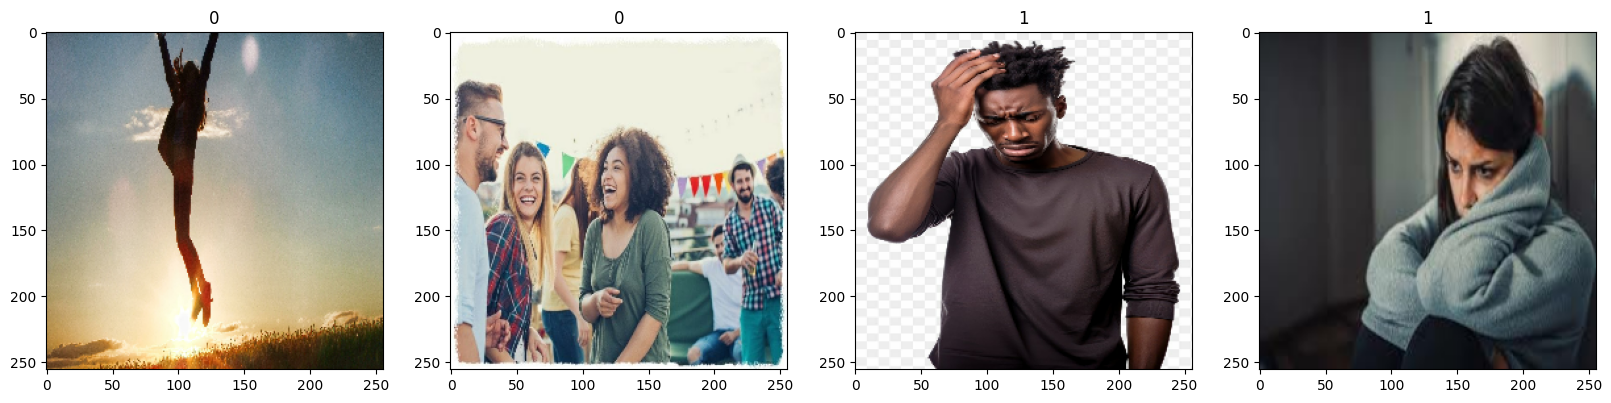

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,30))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [17]:
scaled = batch[0] / 255

In [18]:
scaled.max()

np.float32(1.0)

Scale Data

In [19]:
data = data.map(lambda x, y: (x/255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

np.float32(1.0)

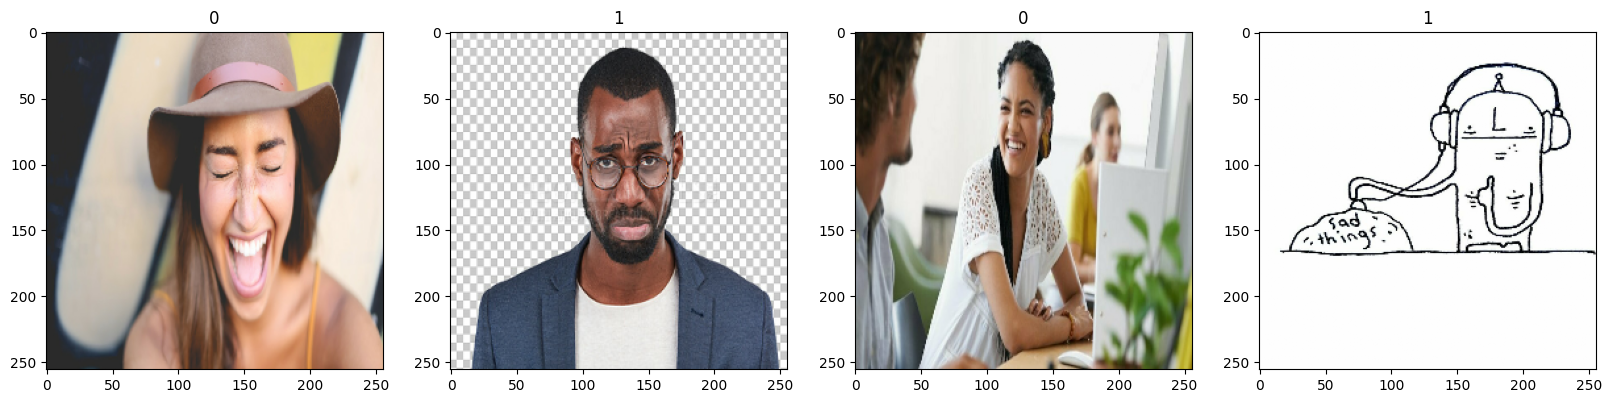

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,30))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Split Data


In [24]:
len(data)

8

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [26]:
test_size+train_size+val_size

8

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train the model


In [33]:
logdir = 'logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.5793 - loss: 1.3874 - val_accuracy: 0.4531 - val_loss: 0.7707
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.4885 - loss: 0.7161 - val_accuracy: 0.6875 - val_loss: 0.6608
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.6034 - loss: 0.6584 - val_accuracy: 0.6250 - val_loss: 0.6062
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.6646 - loss: 0.6047 - val_accuracy: 0.7500 - val_loss: 0.5511
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7691 - loss: 0.5108 - val_accuracy: 0.7656 - val_loss: 0.4813
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.7776 - loss: 0.4581 - val_accuracy: 0.7812 - val_loss: 0.4272
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.8387 - loss: 0.3651 - val_accuracy: 0.9062 - val_loss: 0.2787
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8988 - loss: 0.2850 - val_accuracy: 0.7812 - val_loss: 0.4640
Epoch 9/

In [36]:
hist.history

{'accuracy': [0.512499988079071,
  0.512499988079071,
  0.6187499761581421,
  0.6812499761581421,
  0.78125,
  0.793749988079071,
  0.862500011920929,
  0.8812500238418579,
  0.8500000238418579,
  0.9125000238418579,
  0.925000011920929,
  0.918749988079071,
  0.956250011920929,
  0.9624999761581421,
  0.9750000238418579,
  0.96875,
  0.96875,
  0.9624999761581421,
  0.949999988079071,
  0.96875],
 'loss': [1.3489011526107788,
  0.7021839022636414,
  0.6407740712165833,
  0.6076167821884155,
  0.48612847924232483,
  0.4461330771446228,
  0.3534984886646271,
  0.30377504229545593,
  0.35406532883644104,
  0.2572554647922516,
  0.19635789096355438,
  0.17665307223796844,
  0.13378696143627167,
  0.1110149472951889,
  0.07062108814716339,
  0.07081013917922974,
  0.0693463683128357,
  0.0637676864862442,
  0.06439149379730225,
  0.05552297830581665],
 'val_accuracy': [0.453125,
  0.6875,
  0.625,
  0.75,
  0.765625,
  0.78125,
  0.90625,
  0.78125,
  0.875,
  0.875,
  0.859375,
  0.953125

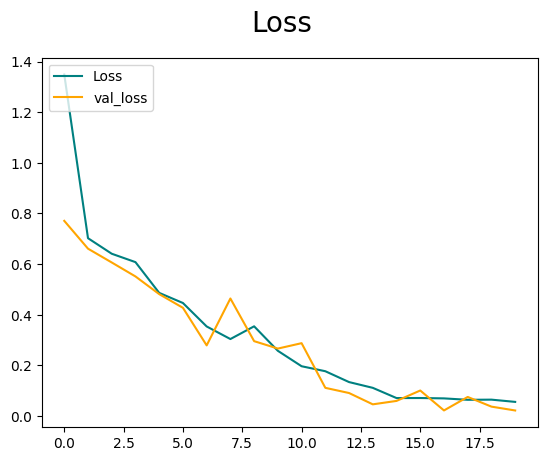

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='Loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


Evaluate Performance


In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


In [42]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


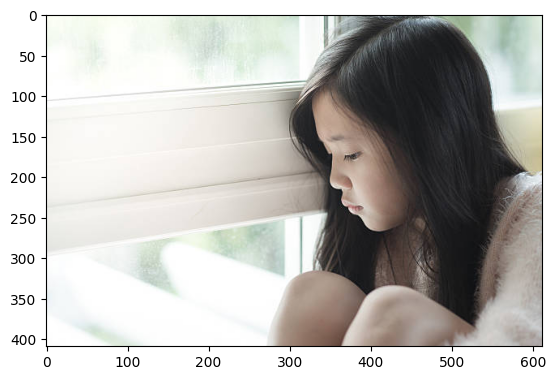

In [56]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

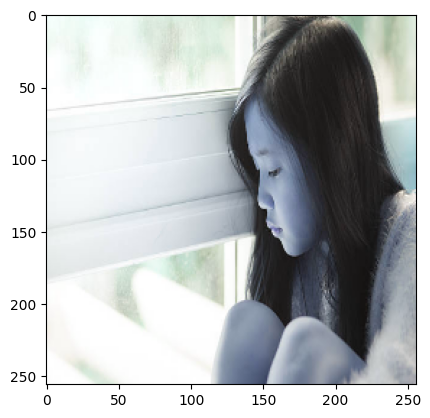

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
resize.shape

TensorShape([256, 256, 3])

In [59]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [61]:
yhat

array([[0.9860402]], dtype=float32)

In [62]:
if yhat > 0.5:
  print("Predicted class is Sad")
else:
  print("Predicted class is Happy")

Predicted class is Sad


Save the Model

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [65]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [66]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


array([[0.9860402]], dtype=float32)